<li> Surbhi Thole - sst390
    
## NYC Crimes Data Analysis

## Data cleaning

<ul>
    <li> We are validating all the columns based on the values that are mandotory to be present in the columns
        <li> If the values are out of the list, we remove those values while cleaning
            <li> We are removing all the columns which do not play important role in our analysis
                

#### Read data file

In [16]:
# Importing all the libraries
import pandas as pd
import numpy as np

# Import the crimes data for analysis
data = pd.read_csv("NYPD_Complaint_Data_Historic.csv")

#### Validate Complaint Number Column

In [17]:
# Validate if the complaint number column consists of integer numbers only
def check_comp_num(data):
    # Checking the complaint_number column. Check if all of them are integers 
    comp_numList = list(data['CMPLNT_NUM'])
    incorrectCompNumList = [s for s in comp_numList if not str(s).isdigit()]
    if len(incorrectCompNumList) > 0:
        for i in incorrectCompNumList:
            data = data[data.CMPLNT_NUM != i]
    else:
        return data

#### Valiadate Date Column

In [18]:
# Validate if the Date column 
def validate_date(data):
    # Checking for date columns. If it has irrelevant dates, remove the entry or convert it to datetime format
    data['CMPLNT_FR_DT'] = pd.to_datetime(data.CMPLNT_FR_DT, errors = 'coerce')
    data['CMPLNT_TO_DT'] = pd.to_datetime(data.CMPLNT_TO_DT, errors = 'coerce')
    data['RPT_DT'] = pd.to_datetime(data.RPT_DT, errors = 'coerce')
    return data


#### Validate Time column

In [19]:
# Validate the Time column 
def validate_time(data):
    # Checking for time columns. If it has irrelevant time, remove the entry or convert it to datetime format
    data['CMPLNT_FR_TM'] = pd.to_datetime(data['CMPLNT_FR_TM'], format='%H:%M:%S', errors = 'coerce').dt.hour
    data['CMPLNT_TO_TM'] = pd.to_datetime(data['CMPLNT_TO_TM'], format = '%H:%M:%S', errors = 'coerce').dt.hour
    return data


#### Validate Key Codes

In [20]:
# Validate the codes associated with crimes description
def validate_keyCodes(data):
    # Check if the offence code column has a three digit number and does not contain alphabets
    keyCodeList = list(data['KY_CD'])
    incorrectCompNumList = [s for s in keyCodeList if not str(s).isdigit()]
    incorrectLengthOfCode = [s for s in keyCodeList if not len(str(s)) == 3]
    if len(incorrectCompNumList) == 0:
        return data
    else:
        for i in incorrectCompList:
            data = data[data.KY_CD != i]
        for i in incorrectLengthOfCode:
            data = data[data.KY_CD != i]
    return data


#### Validate the crime indicator column

In [21]:
# Validate the crime indicator column
def validate_crime_indicator(data):
    # check if the columns consists of crimes mentioned in the below crime_indicator_list
    crime_indicator_list = ["COMPLETED", "ATTEMPTED", "FAILED", "INTERRUPTED PREMATURELY"]
    data = data[data['CRM_ATPT_CPTD_CD'].isin(crime_indicator_list)]
    return data


#### Validate the offence description column

In [22]:
# Validating the offence done
def validate_offence(data):
    # Check if the offence column just consists of following mentioned offences
    offence_list = ["FELONY", "MISDEMEANOR", "VIOLATION"]
    data = data[data['LAW_CAT_CD'].isin(offence_list)]
    return data


#### Validate the borough names 

In [23]:
# Validate if the borough column consists of the NYC 5 borough names
def validate_borough(data):
    borough_list = ["BRONX","BROOKLYN","MANHATTAN","QUEENS","STATEN ISLAND"]
    data = data[data['BORO_NM'].isin(borough_list)]
    return data


#### Validate Latitude range of NYC

In [24]:
# Validate if the Latitude range is between NYC's latitude range
def validate_latitude(data):
    data = data[data['Latitude'].between(40.477399,40.917577)]
    return data


#### Validate Longitude range of NYC

In [25]:
# Validate if the longitude range is between NYC's longitude range
def validate_logitude(data):
    data = data[data['Longitude'].between(-74.25909, -73.700009)]
    return data


#### Remove columns which do not play any role in Data Analysis

In [26]:
#Remove all the columns which we are not going to consider for analysis
def valiadate_remain_column(data):
    del data['X_COORD_CD']
    del data['Y_COORD_CD']
    del data['Lat_Lon']
    del data['PD_CD']
    del data['TRANSIT_DISTRICT']
    del data['STATION_NAME']
    del data['HADEVELOPT']
    del data['PARKS_NM']
    del data['HOUSING_PSA']
    del data['JURIS_DESC']
    del data['JURISDICTION_CODE']
    return data 

In [27]:
data = check_comp_num(data)
data = validate_date(data)
data = validate_time(data)
data = validate_keyCodes(data)
data = validate_crime_indicator(data)
data = validate_offence(data)
data = validate_borough(data)
data = validate_latitude(data)
data = validate_logitude(data)
data = valiadate_remain_column(data)

## Cleaned NYC crime's data from the year 2016

In [28]:
clean_data = data
clean_data = clean_data.loc[(clean_data['CMPLNT_FR_DT'].dt.year >= 2006)] 

## Analysis of CRIMES in NYC from the year 2006

### Count of crimes in each month from the year 2006
<ul>
<li> We can see from the below graph, the highest rates of crimes occur in the months from May - November

Text(0.5, 0, 'MONTHS')

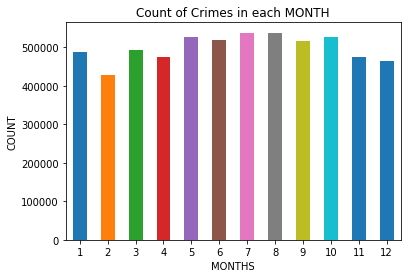

In [30]:
# Crimes count over months 
test1 = clean_data[['PD_DESC']].groupby([clean_data['CMPLNT_FR_DT'].dt.month.rename('month')]).count().reset_index()
test1['PD_DESC'] = test1['PD_DESC'].astype(int)
ax = test1.plot.bar(x='month', y='PD_DESC', rot=0, title = "Count of Crimes in each MONTH", legend = False)
ax.set_ylabel("COUNT")
ax.set_xlabel("MONTHS")



### Count of crimes in each year from 2006

<ul>
    <li>We can analyze that the maximum number of crimes happened in the year 2007 and 2008. This may be attributed to one of the factors that Recession striked in these years and lead to crimes.
        <li> We can also see that the crime rates fall as we proceed further years. 

Text(0.5, 0, 'YEAR')

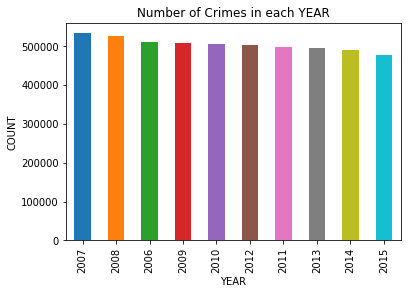

In [31]:
# Crime counts over the years
test1 = clean_data[['PD_DESC']].groupby([clean_data['CMPLNT_FR_DT'].dt.year.rename('year')]).count().reset_index()
test1 = test1.sort_values(by=['PD_DESC'], ascending = False)
ax = test1.head(10).plot.bar(x='year', y='PD_DESC', rot=90, title = "Number of Crimes in each YEAR", legend = False)
ax.set_ylabel("COUNT")
ax.set_xlabel("YEAR")

### Count of crimes in each Borough
<ul>
    <li>From the below graph we can see that the highest number of crimes takes place in Brooklyn. 
        <li>It also states that Staten Island is the safest place to be in having the lowest number of crimes over the years

Text(0.5, 0, 'BOROUGH')

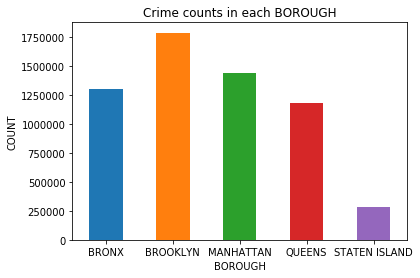

In [32]:
boroughNames = clean_data.groupby(['BORO_NM']).size().reset_index(name='COUNTS')
ax = boroughNames.head(10).plot.bar(x='BORO_NM', y='COUNTS', rot=0, title = 'Crime counts in each BOROUGH', legend = False)
ax.set_ylabel("COUNT")
ax.set_xlabel("BOROUGH")

### Count based on Area density of Boroughs
<ul>
    <li>On the contray from the above graph, the below graph shows statistcs based on area of each Borough and their crimes rates.
        <li>It shows that Manhattan has the highest rate of crimes, Staten Island still being the safest neighbourhood to stay in

1    1786808
2    1435114
0    1300085
3    1184054
4     284333
Name: COUNTS, dtype: int64


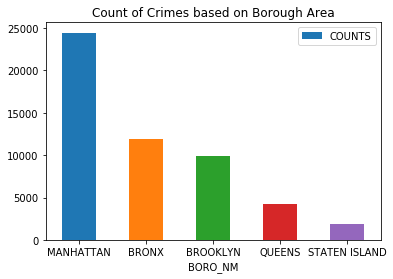

In [33]:
boroughNames = clean_data.groupby(['BORO_NM']).size().reset_index(name='COUNTS')
boroughNames = boroughNames.sort_values(by=['COUNTS'], ascending = False)
# ax = boroughNames.plot.bar(x='BORO_NM', y='COUNTS', rot=0)

boroughNamesAreaDensity = boroughNames.copy()
# area density of crimes
print(boroughNamesAreaDensity['COUNTS'])
c1 = boroughNamesAreaDensity['COUNTS'][1] / 181 #Brooklyn
c2 = boroughNamesAreaDensity['COUNTS'][2] / 58.7 #manhattan
c3 = boroughNamesAreaDensity['COUNTS'][0] / 109 # Bronx
c4 = boroughNamesAreaDensity['COUNTS'][3] / 282 # queens
c5 = boroughNamesAreaDensity['COUNTS'][4] / 151 # Staten Island

boroughNamesAreaDensity['COUNTS'] = [c1,c2,c3,c4,c5]
boroughNamesAreaDensity = boroughNamesAreaDensity.sort_values(by=['COUNTS'], ascending = False)
ax = boroughNamesAreaDensity.plot.bar(x='BORO_NM', y='COUNTS', rot=0, title = "Count of Crimes based on Borough Area")


### Count of crimes based on Population density of Boroughs
<ul>
    <li>We can analyze from the below graph that Manhattan and Bronx are the areas where should be careful of the crimes, where as Staten Island still being the safest place

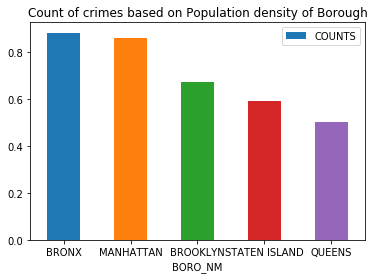

In [34]:
# # population density of crimes

boroughNamesPopDensity = boroughNames.copy()
c1 = boroughNamesPopDensity['COUNTS'][1] / 2648771 #Brooklyn
c2 = boroughNamesPopDensity['COUNTS'][2] / 1664727 #manhattan
c3 = boroughNamesPopDensity['COUNTS'][0] / 1471160 # Bronx
c4 = boroughNamesPopDensity['COUNTS'][3] / 2358582 # queens
c5 = boroughNamesPopDensity['COUNTS'][4] / 479458 # Staten Island

boroughNamesPopDensity['COUNTS'] = [c1,c2,c3,c4,c5]
boroughNamesPopDensity = boroughNamesPopDensity.sort_values(by=['COUNTS'], ascending = False)
ax = boroughNamesPopDensity.plot.bar(x='BORO_NM', y='COUNTS', rot=0, title = "Count of crimes based on Population density of Borough")

<ul>
<li> From all the above three graphs showing the crimes in Boroughs of NYC, we can finally conclude that Brooklyn, Manhattan has the highest rates of crimes, where as Staten Island is the most safe place among all.

### Analysis of types of Level of offence

<ul>
    <li>The below shown Pie diagram shows the Level of offence percentage

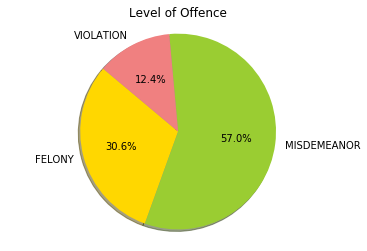

In [35]:
import matplotlib.pyplot as plt

offence_level_count = clean_data.groupby(['LAW_CAT_CD']).size().reset_index(name='COUNTS')
offence_level_count

colors = ['gold', 'yellowgreen', 'lightcoral']
explode = (0, 0, 0)  

plt.pie(offence_level_count['COUNTS'], explode=explode, labels=list(offence_level_count['LAW_CAT_CD']), colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Level of Offence")
plt.axis('equal')
plt.show()

#### The following Table shows the top 5 crimes in each Borough

In [37]:
s = clean_data['PD_DESC'].groupby(clean_data['BORO_NM']).value_counts()
s1 = pd.DataFrame(s.groupby(level=0).nlargest(5).reset_index(level=0, drop=True))
s1['Count'] = s1['PD_DESC']
del s1['PD_DESC']
s1 = s1.reset_index()
s1.head()

,BORO_NM,PD_DESC,Count
0,BRONX,ASSAULT 3,125298
1,BRONX,"HARASSMENT,SUBD 3,4,5",96077
2,BRONX,"MARIJUANA, POSSESSION 4 & 5",77406
3,BRONX,AGGRAVATED HARASSMENT 2,70625
4,BRONX,"HARASSMENT,SUBD 1,CIVILIAN",62558


#### Locations of Crimes taking place
<ul> 
    <li> The below graph shows that the maximum number of crimes takes place in "Inside" of the unsafe locations. Usually is is considered that the outside areas are not safe, but the analysis shows that the crimes take place mostly inside the grocery store, inside the College, Inside the Park etc

Text(0.5, 0, 'LOCATION')

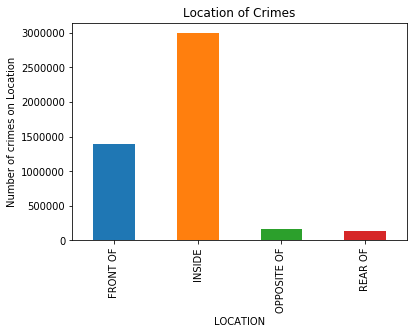

In [38]:
# Highest location of crimes 
location = clean_data.groupby(['LOC_OF_OCCUR_DESC']).size().reset_index(name='COUNTS')
ax = location.plot.bar(x='LOC_OF_OCCUR_DESC', y='COUNTS', rot=90, title = "Location of Crimes", legend = False)
ax.set_ylabel("Number of crimes on Location")
ax.set_xlabel("LOCATION")

### The below graph shows the count of most occuring crimes in NYC

Text(0.5, 0, 'CRIMES')

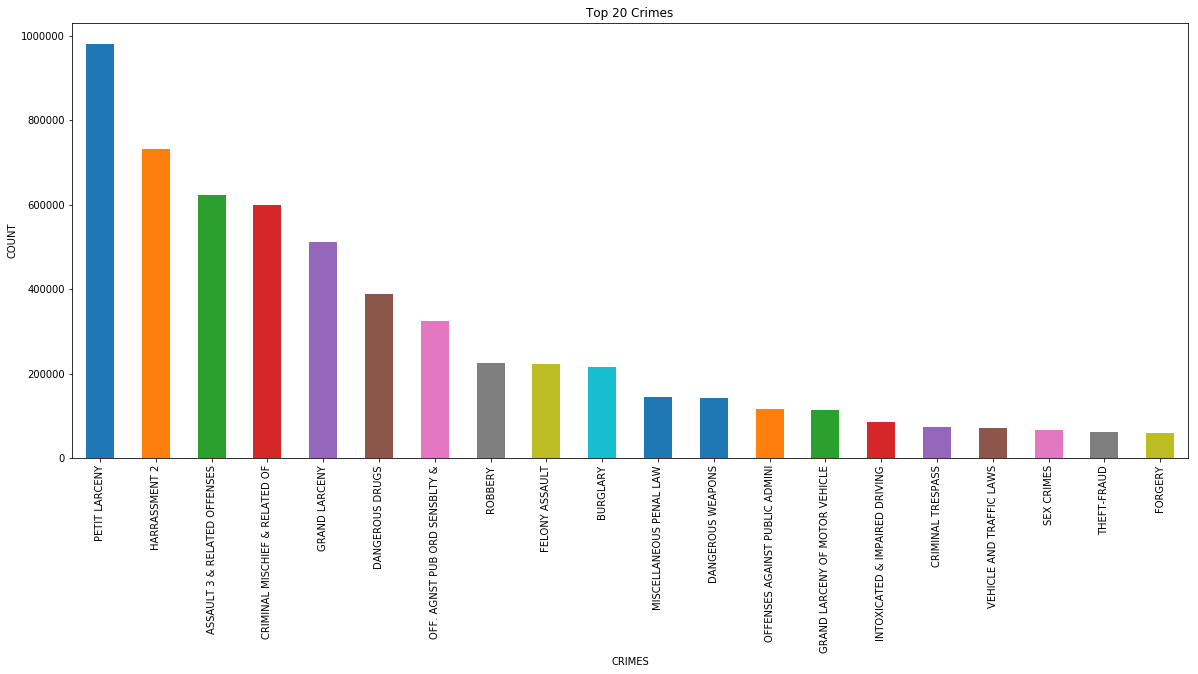

In [39]:
# top 20 crime types
x = clean_data.groupby(['OFNS_DESC']).size().reset_index(name='COUNTS')
x = x.sort_values(by=['COUNTS'], ascending=False)
ax = x.head(20).plot.bar(x='OFNS_DESC', y='COUNTS', figsize=(20,8), rot=90, title = "Top 20 Crimes", legend = False, )
ax.set_ylabel("COUNT")
ax.set_xlabel("CRIMES")

### Plot of Top 3 crimes in each Borough

Text(0.5, 0, 'BOROUGHS')

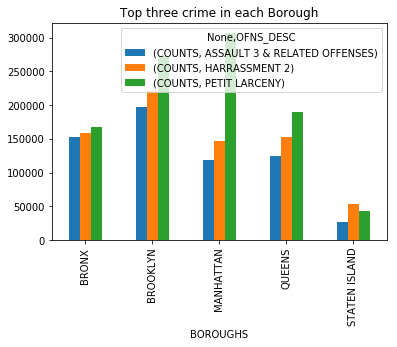

In [40]:
# Analysing the top 3 crimes in all the boroughs
topCrimesByBorough=clean_data.loc[clean_data['OFNS_DESC'].isin(['PETIT LARCENY','HARRASSMENT 2','ASSAULT 3 & RELATED OFFENSES'])]
topCrimesByBorough=topCrimesByBorough.groupby(['BORO_NM','OFNS_DESC']).size().reset_index(name='COUNTS')
topCrimesByBorough = topCrimesByBorough.set_index(['BORO_NM','OFNS_DESC']).unstack()
topCrimesByBorough.plot.bar(title = "Top three crime in each Borough").set_xlabel("BOROUGHS")

### Analysis of Seasonal Crimes

#### Analysis of crime on Christmas (25th December)

<ul>
    <li> The below graph shows the count of crimes in each borough on Christmas
    <li>We can see Brooklyn is the most unsafe place to be in during Christmas

Text(0.5, 0, 'BOROUGH')

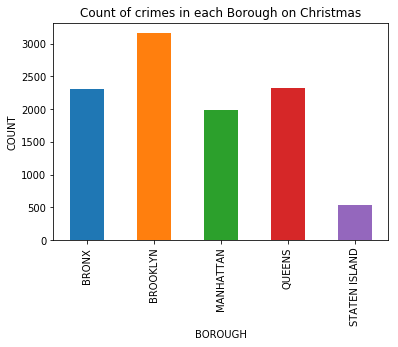

In [41]:
# Crimes in each borough on 25th dec
christmas = clean_data[['CMPLNT_FR_DT','BORO_NM','OFNS_DESC','LOC_OF_OCCUR_DESC','PD_DESC']].loc[(clean_data['CMPLNT_FR_DT'].dt.month==12) & (clean_data['CMPLNT_FR_DT'].dt.day==25)] 
boroughNames = christmas.groupby(['BORO_NM']).size().reset_index(name='COUNTS')
ax = boroughNames.head(10).plot.bar(x='BORO_NM', y='COUNTS', rot=90, title = "Count of crimes in each Borough on Christmas", legend=False)
ax.set_ylabel("COUNT")
ax.set_xlabel("BOROUGH")


<ul>
    <li>The below graph shows the line plot of counts of crimes over the years on Christmas
     <li> We can see that 2015 has the highest number of crimes on Christmas in NYC   

Text(0.5, 0, 'YEAR')

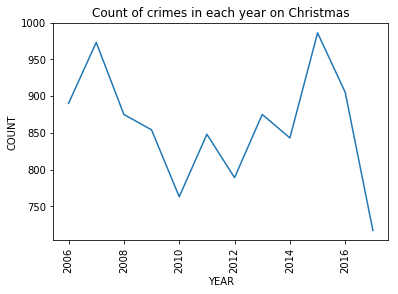

In [42]:
# No of Crimes in each year on 25th dec
test1 = christmas[['PD_DESC']].groupby([christmas['CMPLNT_FR_DT'].dt.year.rename('year')]).count().reset_index()
# test1 = test1.sort_values(by=['PD_DESC'], ascending = False)
ax = test1.plot.line(x='year', y='PD_DESC', rot=90, title = "Count of crimes in each year on Christmas", legend = False)
ax.set_ylabel("COUNT")
ax.set_xlabel("YEAR")

<ul>
<li>The following graph shows the top three crimes in each Borough on Christmas

Text(0.5, 0, 'BOROUGHS')

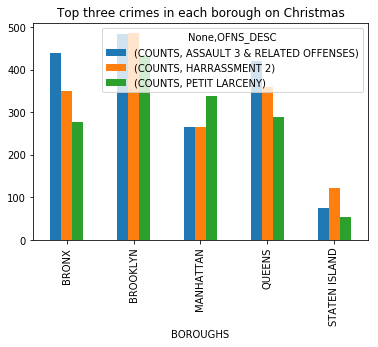

In [43]:
# Top three crimes in each borough on 25th December 
topCrimesByBorough=christmas.loc[christmas['OFNS_DESC'].isin(['PETIT LARCENY','HARRASSMENT 2','ASSAULT 3 & RELATED OFFENSES'])]
topCrimesByBorough=topCrimesByBorough.groupby(['BORO_NM','OFNS_DESC']).size().reset_index(name='COUNTS')
topCrimesByBorough = topCrimesByBorough.set_index(['BORO_NM','OFNS_DESC']).unstack()
topCrimesByBorough.plot.bar(title = "Top three crimes in each borough on Christmas").set_xlabel("BOROUGHS")

<ul>
    <li> Top 5 crimes that take place on Christmas

Text(0.5, 0, 'Crime Description')

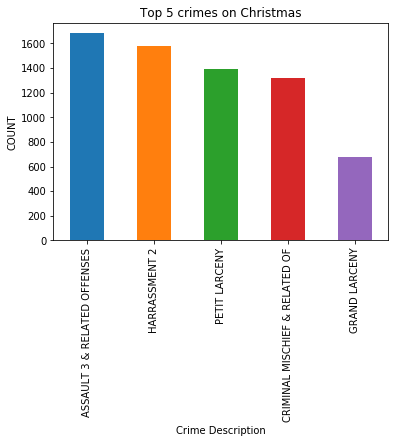

In [44]:
# Top crimes on christmas
x = christmas.groupby(['OFNS_DESC']).size().reset_index(name='COUNTS')
x = x.sort_values(by=['COUNTS'], ascending=False)
x.head(10)
ax = x.head(5).plot.bar(x='OFNS_DESC', y='COUNTS', rot=90, title = "Top 5 crimes on Christmas", legend = False)
ax.set_ylabel("COUNT")
ax.set_xlabel("Crime Description")


#### Analysis of crimes on Thanksgiving (November 18)
<ul> 
    <li>The below graph shows the count of Crimes taking place on Thanksgiving from the past 15 years.
        <li>It can be seen that, brooklyn is the most unsafe place on the day of Thanksgiving

Text(0.5, 0, 'BOROUGH')

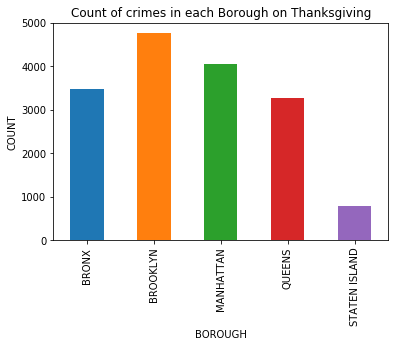

In [45]:
# Crimes in each borough on November 18
thanksgiving = clean_data[['CMPLNT_FR_DT','BORO_NM','OFNS_DESC','LOC_OF_OCCUR_DESC','PD_DESC']].loc[(clean_data['CMPLNT_FR_DT'].dt.month==11) & (clean_data['CMPLNT_FR_DT'].dt.day==18)] 
boroughNames = thanksgiving.groupby(['BORO_NM']).size().reset_index(name='COUNTS')
ax = boroughNames.head(10).plot.bar(x='BORO_NM', y='COUNTS', rot=90, title = "Count of crimes in each Borough on Thanksgiving", legend=False)
ax.set_ylabel("COUNT")
ax.set_xlabel("BOROUGH")


<ul>
    <li>The count of crimes taking place each year on Thanksgiving
        <li>The following graph shows that 2010 was the year with maximum crimes taking place on Thanksgiving

Text(0.5, 0, 'YEAR')

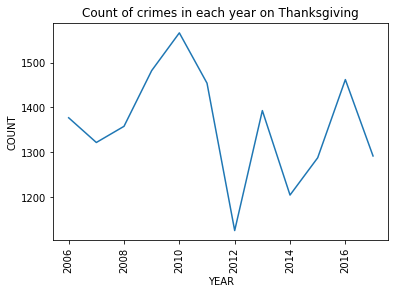

In [46]:
# No of Crimes in each year on November 18
test1 = thanksgiving[['PD_DESC']].groupby([thanksgiving['CMPLNT_FR_DT'].dt.year.rename('year')]).count().reset_index()
ax = test1.plot.line(x='year', y='PD_DESC', rot=90, title = "Count of crimes in each year on Thanksgiving", legend = False)
ax.set_ylabel("COUNT")
ax.set_xlabel("YEAR")

<ul>
    <li>The following graph shows the top three crimes in each borough on the day of Thanksgiving
        

Text(0.5, 0, 'BOROUGHS')

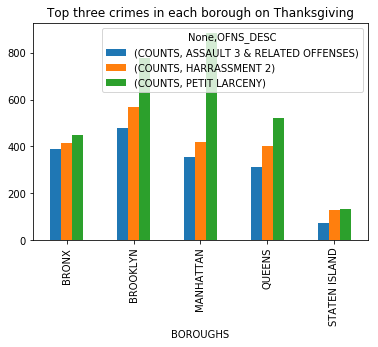

In [47]:
# Top three crimes in each borough on November 18
topCrimesByBorough=thanksgiving.loc[thanksgiving['OFNS_DESC'].isin(['PETIT LARCENY','HARRASSMENT 2','ASSAULT 3 & RELATED OFFENSES'])]
topCrimesByBorough=topCrimesByBorough.groupby(['BORO_NM','OFNS_DESC']).size().reset_index(name='COUNTS')
topCrimesByBorough = topCrimesByBorough.set_index(['BORO_NM','OFNS_DESC']).unstack()
topCrimesByBorough.plot.bar(title = "Top three crimes in each borough on Thanksgiving").set_xlabel("BOROUGHS")

#### Count of Crimes taking place over the years
<ul>
    <li>We can see from the below graph that our neighbourhoods are becoming safe over years with a continuous decrease in count of crimes.

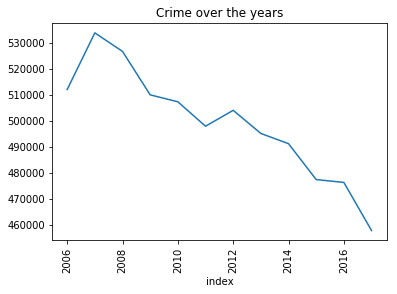

In [48]:
# crime over the years
yearlyRec = clean_data['CMPLNT_FR_DT'].dt.year
yearlyRec = yearlyRec.value_counts().reset_index().sort_values(by=['index'], ascending = True)
yearlyRec.plot.line(x='index', y='CMPLNT_FR_DT', rot=90, title = "Crime over the years", legend = False,)


#### Top crimes taken place in the year 2007.
<ul>
    <li>It can be seen from the above graph that the max number of crimes took place in the year 2007.
        <li>Below graph shows the top 5 crimes taken place in the year 2007

Text(0.5, 0, 'Crime Description')

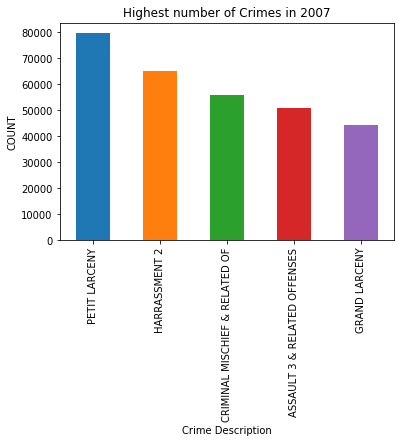

In [49]:
# Top crimes in the year 2007 as it has the highest rates of crimes 
year2015 = clean_data[['CMPLNT_FR_DT','BORO_NM','OFNS_DESC','LOC_OF_OCCUR_DESC','PD_DESC']].loc[(clean_data['CMPLNT_FR_DT'].dt.year==2007)] 
x = year2015.groupby(['OFNS_DESC']).size().reset_index(name='COUNTS')
x = x.sort_values(by=['COUNTS'], ascending=False)
x.head(10)
ax = x.head(5).plot.bar(x='OFNS_DESC', y='COUNTS', rot=90, title = 'Highest number of Crimes in 2007', legend = False)
ax.set_ylabel("COUNT")
ax.set_xlabel("Crime Description")

#### The Victim gender group
<ul>
    <li>The following graph shows that Females are the most victim of all the crimes

Text(0.5, 0, 'VICTIM GENDER')

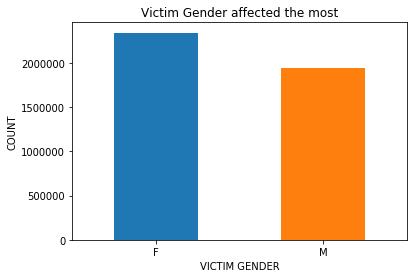

In [50]:
# Gender that is affected the most Victim
def validate_victimGender(data):
    genderList = ['M','F']
    data = data[data['VIC_SEX'].isin(genderList)]
    return data
victimesexdata = validate_victimGender(data)

VictimSex = victimesexdata.groupby(['VIC_SEX']).size().reset_index(name='COUNTS')
ax = VictimSex.head(10).plot.bar(x='VIC_SEX', y='COUNTS', rot=0, title = "Victim Gender affected the most", legend = False)
ax.set_ylabel("COUNT")
ax.set_xlabel("VICTIM GENDER")


#### Victim age group
<ul>
    <li>From the below graph it can be seen that the age group of 25-44 is mostly affected
        

Text(0.5, 0, 'VICTIM AGE GROUP')

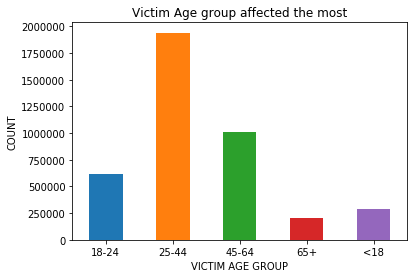

In [51]:
# Victim Age group that is affected the most
def validate_victimAge(data):
    ageList = ['<18','18-24','25-44','45-64','65+']
    data = data[data['VIC_AGE_GROUP'].isin(ageList)]
    return data
Victimdata = validate_victimAge(data)

VictimAge = Victimdata.groupby(['VIC_AGE_GROUP']).size().reset_index(name='COUNTS')
ax = VictimAge.head(10).plot.bar(x='VIC_AGE_GROUP', y='COUNTS', rot=0, title = "Victim Age group affected the most", legend = False)
ax.set_ylabel("COUNT")
ax.set_xlabel("VICTIM AGE GROUP")


#### Suspect Gender Group
<ul>
    <li>The following graph shows that the Males are reponsible for many crimes taking place

Text(0.5, 0, 'SUSPECT GENDER')

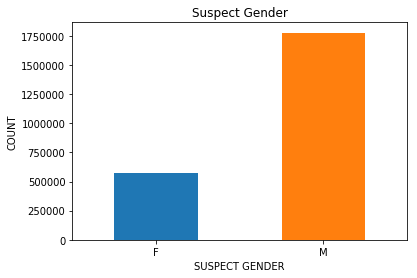

In [52]:
# Suspect sex that is found the most
def validate_suspectGender(data):
    genderList = ['M','F']
    data = data[data['SUSP_SEX'].isin(genderList)]
    return data
suspectgenderdata = validate_suspectGender(data)

suspectSex = suspectgenderdata.groupby(['SUSP_SEX']).size().reset_index(name='COUNTS')
ax = suspectSex.head(10).plot.bar(x='SUSP_SEX', y='COUNTS', rot=0, title = "Suspect Gender", legend = False)
ax.set_ylabel("COUNT")
ax.set_xlabel("SUSPECT GENDER")



#### Suspect age group
<ul>
    <li>The following graph shows that the age group of people 25-44 are the most suspects in the crimes that take place
        

Text(0.5, 0, 'SUSPECT AGE GROUP')

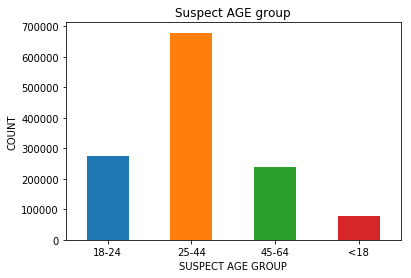

In [53]:
# Suspect age group found
def validate_suspectAge(data):
    ageList = ['<18','18-24','25-44','45-64','64+']
    data = data[data['SUSP_AGE_GROUP'].isin(ageList)]
    return data
suspectage = validate_suspectAge(data)

suspectAge = suspectage.groupby(['SUSP_AGE_GROUP']).size().reset_index(name='COUNTS')
ax = suspectAge.head(10).plot.bar(x='SUSP_AGE_GROUP', y='COUNTS', rot=0, title = "Suspect AGE group", legend = False)
ax.set_ylabel("COUNT")
ax.set_xlabel("SUSPECT AGE GROUP")
